In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score

In [2]:
events_data = pd.read_csv('event_data_train.csv')
events_data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [3]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [4]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')
events_data

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30


In [5]:
events_data['day'] = events_data.date.dt.date
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


<Axes: xlabel='day'>

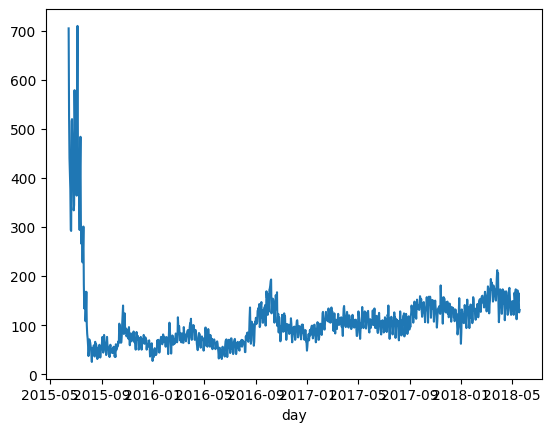

In [6]:
events_data.groupby('day').user_id.nunique().plot()

In [7]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


<Axes: >

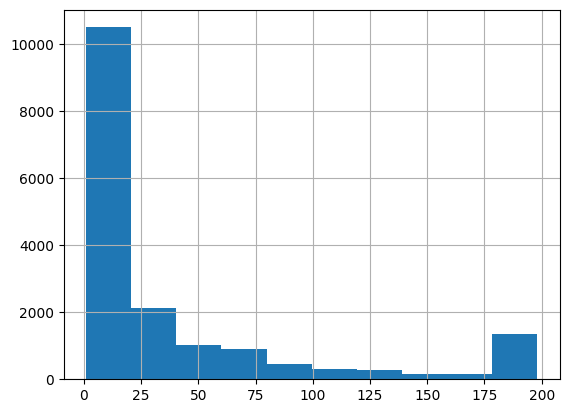

In [8]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index = False) \
    .agg({'step_id': 'count'}) \
    .rename(columns={'step_id' : 'passed_step'}).passed_step.hist()

<Axes: >

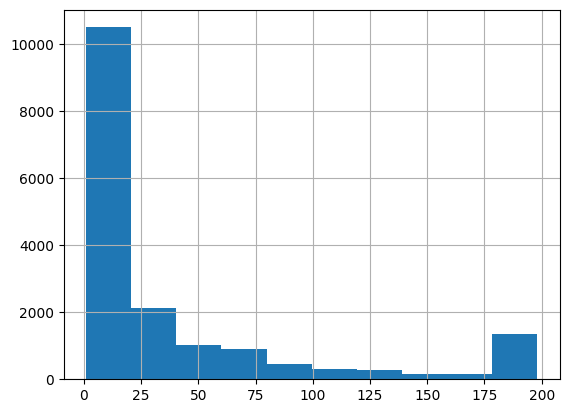

In [9]:
check = events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index = False) \
    .agg({'step_id': 'count'}) \
    .rename(columns={'step_id' : 'passed_step'})
check.passed_step.hist()

In [10]:
check.user_id.nunique()

17262

In [11]:
events_data.user_id.nunique()

19234

In [12]:
check = events_data.pivot_table(index = 'user_id', columns = 'action', values = 'step_id', aggfunc = 'count', fill_value = 0).reset_index()
check

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


<Axes: >

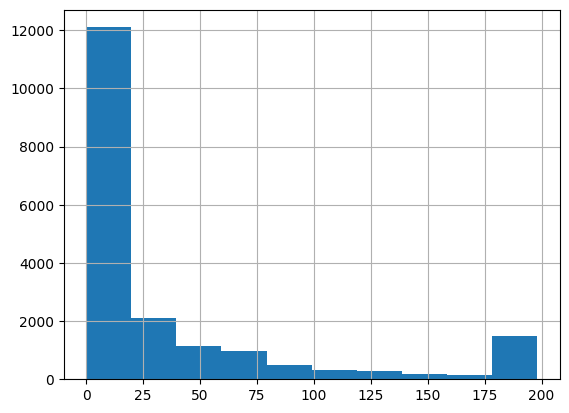

In [13]:
check.discovered.hist()

In [14]:
submissions_data_train = pd.read_csv('submissions_data_train.csv')
submissions_data_train

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [15]:
submissions_data_train['date'] = pd.to_datetime(submissions_data_train.timestamp, unit = 's')
submissions_data_train['day'] = submissions_data_train.date.dt.date
submissions_data_train

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [16]:
check2 = submissions_data_train.pivot_table(index = 'user_id', \
                                           columns = 'submission_status', \
                                           values = 'step_id', aggfunc = 'count', \
                                           fill_value = 0).reset_index()

In [17]:
check2

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [18]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [19]:
date_gap = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id').timestamp.apply(list).apply(np.diff).values

In [20]:
date_gap

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int32)], dtype=object)

In [21]:
date_gap = pd.Series(np.concatenate(date_gap, axis = 0))

In [22]:
date_gap  = date_gap / (24 * 60 * 60)

<Axes: >

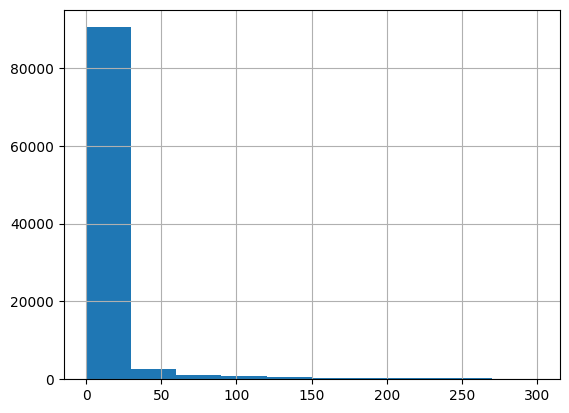

In [23]:
date_gap[date_gap < 300].hist()

In [24]:
date_gap.quantile(0.93)

34.770257870370365

In [25]:
submissions_data_train

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [26]:
submissions_data_train.pivot_table(index = 'user_id', \
                        columns = 'submission_status', \
                        values = 'step_id', \
                        aggfunc = 'count', \
                        fill_value = 0).correct.sort_values()

user_id
22862      0
12222      0
871        0
22080      0
25472      0
        ... 
8461     135
6183     142
17135    168
5552     186
1046     421
Name: correct, Length: 9940, dtype: int64

In [27]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [28]:
unique_day = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [29]:
users_data = events_data.groupby('user_id').agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timetamp'}).reset_index()
now = 1526772811
one_month = 30 * 24 * 60 * 60

In [30]:
users_data['not_active'] = (now - users_data.last_timetamp) > one_month

In [31]:
users_data = users_data.merge(check2, on = 'user_id', how='outer').fillna(0)

In [32]:
users_data = users_data.merge(check, on = 'user_id', how='outer').fillna(0)

In [33]:
users_data = users_data.merge(unique_day, on = 'user_id', how='outer').fillna(0)

In [34]:
users_data

,user_id,last_timetamp,not_active,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [35]:
users_data.user_id.nunique()

19234

In [36]:
events_data.user_id.nunique()

19234

In [37]:
users_data['passed_course'] = users_data.passed > 170

In [38]:
users_data[users_data.passed_course == True].passed_course.count()

1425

In [39]:
users_data

,user_id,last_timetamp,not_active,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


In [40]:
user_first_time = events_data.groupby('user_id', as_index = False) \
    .agg({'timestamp' : 'min'}) \
    .rename(columns={'timestamp' : 'min_timestamp'})


In [41]:
users_data

,user_id,last_timetamp,not_active,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


In [42]:
users_data = users_data.merge(user_first_time, how = 'outer')

In [43]:
user_first_time['user_learning_n_days'] =  user_first_time.min_timestamp + 3*24*60*60

In [44]:
user_first_time

,user_id,min_timestamp,user_learning_n_days
0,1,1472827464,1473086664
1,2,1514383364,1514642564
2,3,1434358476,1434617676
3,5,1466156809,1466416009
4,7,1521634660,1521893860
...,...,...,...
19229,26790,1451484016,1451743216
19230,26793,1510225031,1510484231
19231,26794,1495287049,1495546249
19232,26797,1508425316,1508684516


In [45]:
events_data = events_data.merge(user_first_time[['user_id', 'user_learning_n_days']], how='outer')

In [46]:
events_data_train = events_data[events_data.timestamp <= events_data.user_learning_n_days]

In [47]:
events_data

,step_id,timestamp,action,user_id,date,day,user_learning_n_days
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434600048
...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,1527021864
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,1527021864
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,1527031950
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,1527031950


In [48]:
events_data_train

,step_id,timestamp,action,user_id,date,day,user_learning_n_days
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434600048
...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,1527021864
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,1527021864
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,1527031950
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,1527031950


In [49]:
events_data_train.groupby('user_id').day.nunique().max()

4

In [50]:
user_first_time

,user_id,min_timestamp,user_learning_n_days
0,1,1472827464,1473086664
1,2,1514383364,1514642564
2,3,1434358476,1434617676
3,5,1466156809,1466416009
4,7,1521634660,1521893860
...,...,...,...
19229,26790,1451484016,1451743216
19230,26793,1510225031,1510484231
19231,26794,1495287049,1495546249
19232,26797,1508425316,1508684516


In [51]:
submissions_data_train = submissions_data_train.merge(user_first_time[['user_id', 'user_learning_n_days']], how='outer')

In [52]:
submissions_data_train = submissions_data_train[submissions_data_train.timestamp <= submissions_data_train.user_learning_n_days]

In [53]:
submissions_data_train

,step_id,timestamp,submission_status,user_id,date,day,user_learning_n_days
0,31971.0,1.434349e+09,correct,15853,2015-06-15 06:21:15,2015-06-15,1434605177
1,31972.0,1.434348e+09,correct,15853,2015-06-15 06:05:00,2015-06-15,1434605177
4,31976.0,1.434348e+09,wrong,15853,2015-06-15 06:02:03,2015-06-15,1434605177
5,31976.0,1.434348e+09,correct,15853,2015-06-15 06:03:08,2015-06-15,1434605177
7,31977.0,1.434347e+09,correct,15853,2015-06-15 05:49:31,2015-06-15,1434605177
...,...,...,...,...,...,...,...
509099,120745.0,1.501947e+09,wrong,2615,2017-08-05 15:29:19,2017-08-05,1502205860
509100,120745.0,1.503060e+09,correct,13177,2017-08-18 12:38:47,2017-08-18,1503314487
509101,120745.0,1.506348e+09,wrong,15253,2017-09-25 14:02:33,2017-09-25,1506606463
509102,120745.0,1.523035e+09,wrong,1424,2018-04-06 17:21:56,2018-04-06,1523294469


In [54]:
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [55]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index()

In [56]:
X = X.merge(submissions_data_train.groupby('user_id')
            .step_id.nunique().to_frame()
            .reset_index()
            .rename({'step_id' : 'steps_tried'}, axis = 1))

In [57]:
X = X.merge(submissions_data_train.pivot_table(index = 'user_id',
                                               columns = 'submission_status',
                                               values = 'step_id',
                                               aggfunc = 'count',
                                               fill_value = 0).reset_index())
                                               

In [58]:
X['correct_ratio'] = X['correct'] / (X['correct'] + X['wrong'])

In [59]:
X = X.merge(events_data_train.pivot_table(index = 'user_id',
                                               columns = 'action',
                                               values = 'step_id',
                                               aggfunc = 'count',
                                               fill_value = 0).reset_index()[['user_id', 'viewed']], how='outer').fillna(0)

In [60]:
X = X.merge(users_data[['user_id', 'passed_course', 'not_active']], how = 'outer')

In [61]:
X

,user_id,day,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,not_active
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True
...,...,...,...,...,...,...,...,...,...
19229,26774,0.0,0.0,0.0,0.0,0.00,1,False,True
19230,26781,0.0,0.0,0.0,0.0,0.00,6,True,True
19231,26788,0.0,0.0,0.0,0.0,0.00,1,False,True
19232,26789,0.0,0.0,0.0,0.0,0.00,2,False,True


In [62]:
X = X[~((X.passed_course == False) & (X.not_active == False))]

In [63]:
y = X.passed_course.map(int)

In [64]:
X

,user_id,day,steps_tried,correct,wrong,correct_ratio,viewed,passed_course,not_active
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True
...,...,...,...,...,...,...,...,...,...
19229,26774,0.0,0.0,0.0,0.0,0.00,1,False,True
19230,26781,0.0,0.0,0.0,0.0,0.00,6,True,True
19231,26788,0.0,0.0,0.0,0.0,0.00,1,False,True
19232,26789,0.0,0.0,0.0,0.0,0.00,2,False,True


In [65]:
X = X.drop(['passed_course', 'not_active'], axis = 1)

In [66]:
X = X.set_index('user_id')

In [67]:
X

,day,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.00,9
3,1.0,4.0,4.0,4.0,0.50,20
8,1.0,11.0,9.0,21.0,0.30,154
14,1.0,1.0,0.0,1.0,0.00,9
16,3.0,23.0,23.0,27.0,0.46,132
...,...,...,...,...,...,...
26774,0.0,0.0,0.0,0.0,0.00,1
26781,0.0,0.0,0.0,0.0,0.00,6
26788,0.0,0.0,0.0,0.0,0.00,1


In [81]:
my_tree = tree.DecisionTreeClassifier()

In [82]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [84]:
params ={'criterion' : ['entropy', 'gini'],
          'max_depth' : range(1, 100),
          'min_samples_split' : range(2, 100),
          'min_samples_leaf' : range(1, 100)}

In [88]:
search = RandomizedSearchCV(my_tree, params, cv = 5)

In [89]:
search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(1, 100),
                                        'min_samples_leaf': range(1, 100),
                                        'min_samples_split': range(2, 100)})

In [90]:
search.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 93,
 'max_depth': 25,
 'criterion': 'gini'}

In [91]:
my_tree = search.best_estimator_

In [92]:
my_tree.score(x_test, y_test)

0.9330664887702913

In [93]:
y_test.sum()

305

In [94]:
y_pred = my_tree.predict(x_test)

In [95]:
y_pred.sum()

106

In [96]:
precision_score(y_test, y_pred)

0.5188679245283019

In [97]:
recall_score(y_test, y_pred)

0.18032786885245902